# Week 1

First just try the Gillespie Algorithm:

Text(0, 0.5, '# Infected')

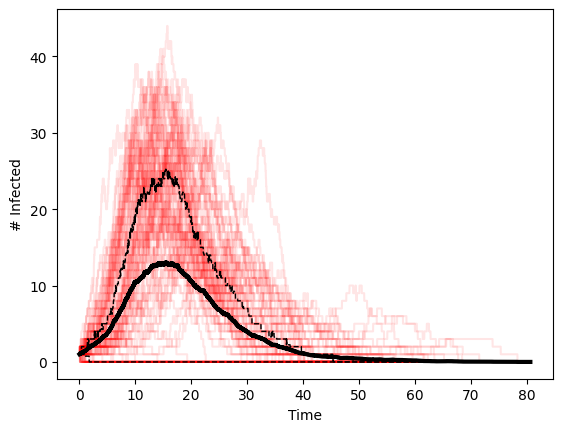

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

from bp_models.gillespie import direct_gillespie

N = 100
beta = 0.5
mu = 0.2

fig, ax = plt.subplots()

ts = []
Is = []
S_finals = []
max_t = 0

for _ in range(100):
    t, I, S_final = direct_gillespie(N, beta, mu)
    
    ts.append(t)
    Is.append(I)
    S_finals.append(S_final)
    
    if t[-1] > max_t:
        max_t = t[-1]

plot_t = np.linspace(0, max_t, num=int(max_t)*1000)
padded_data = []
for t, s in zip(ts, Is):
    padded = interp1d(t, s, bounds_error=False, fill_value=0, kind='nearest')(plot_t)
    ax.plot(plot_t, padded, 'r', alpha=0.1)
    padded_data.append(padded)

padded_data = np.asarray(padded_data)
ax.plot(plot_t, padded_data.mean(axis=0), 'k', linewidth=3)
ax.plot(plot_t, np.quantile(padded_data, 0.25, axis=0), 'k--', linewidth=1)
ax.plot(plot_t, np.quantile(padded_data, 0.75, axis=0), 'k--', linewidth=1)

ax.set_xlabel("Time")
ax.set_ylabel("# Infected")